In [18]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import requests
import time
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from scipy.stats import linregress



In [3]:
data_df = pd.read_csv("Output/CleanedSpeed.csv")
list(data_df.columns.values)

['Unique ID',
 'Gender',
 'Wave',
 'Match',
 'Same Race',
 'Age of Partner',
 'Race of Partner',
 'Partner Preference Attractive',
 'Partner Preference Sincere',
 'Partner Preference Intelligence',
 'Partner Preference Fun',
 'Partner Preference Ambition',
 'Partner Preference Shared Interests',
 'Decision of Partner',
 'Partner Rating Attractive',
 'Partner Rating Sincere',
 'Partner Rating Intelligence',
 'Partner Rating Fun',
 'Partner Rating Ambition',
 'Partner Rating Shared Interests',
 'Age',
 'Field of Study',
 'Race',
 'Same Race Importance',
 'Same Religion Importance',
 'Goal of Event',
 'Intended Career',
 'Interest Sports',
 'Interest Watching Sports',
 'Interest Exercise',
 'Interest Dining',
 'Interest Museums',
 'Interest Art',
 'Interest Hiking',
 'Interest Gaming',
 'Interest Clubbing',
 'Interest Reading',
 'Interest TV',
 'Interest Theater',
 'Interest Movies',
 'Interest Concerts',
 'Interest Music',
 'Interest Shopping',
 'Interest Yoga',
 'Expectation of Happines

 'groupby unique id',  
 'Own Rating Attractive',
 'Own Rating Sincere',
 'Own Rating Fun',
 'Own Rating Intelligence',
 'Own Rating Ambition',
 'Partner Rating Attractive',
 'Partner Rating Sincere',
 'Partner Rating Intelligence',
 'Partner Rating Fun',
 'Partner Rating Ambition',
 'Partner Rating Shared Interests'


In [44]:
self_att_df= pd.DataFrame(data_df.groupby('Unique ID')['Own Rating Attractive'].mean())
self_sin_df= pd.DataFrame(data_df.groupby('Unique ID')['Own Rating Sincere'].mean())
self_fun_df= pd.DataFrame(data_df.groupby('Unique ID')['Own Rating Fun'].mean())
self_int_df= pd.DataFrame(data_df.groupby('Unique ID')['Own Rating Intelligence'].mean())
self_amb_df= pd.DataFrame(data_df.groupby('Unique ID')['Own Rating Ambition'].mean())
part_att_df= pd.DataFrame(data_df.groupby('Unique ID')['Partner Rating Attractive'].mean())
part_sin_df= pd.DataFrame(data_df.groupby('Unique ID')['Partner Rating Sincere'].mean())
part_fun_df= pd.DataFrame(data_df.groupby('Unique ID')['Partner Rating Fun'].mean())
part_int_df= pd.DataFrame(data_df.groupby('Unique ID')['Partner Rating Intelligence'].mean())
part_amb_df= pd.DataFrame(data_df.groupby('Unique ID')['Partner Rating Ambition'].mean())

merge_df = pd.merge(self_att_df, part_att_df, on=["Unique ID"])
merge_drop = merge_df.dropna()


In [14]:
gender_group = data_df.groupby('Gender')

count_makers = gender_group.agg({'Own Rating Attractive':'mean','Own Rating Sincere':'mean', })

count_makers

,Own Rating Attractive,Own Rating Sincere
Gender,,
0,7.076025,8.424723
1,6.933333,8.102519


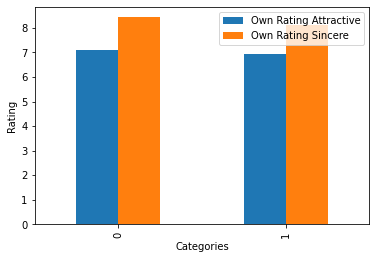

<Figure size 432x288 with 0 Axes>

In [15]:
count_chart = count_makers.plot(kind='bar')

plt.xlabel("Categories")
plt.ylabel("Rating")
plt.show()
plt.tight_layout()

The r-squared is: 0.08242195453269756


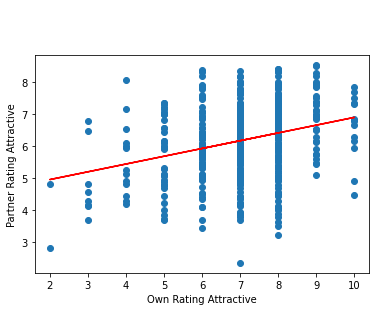

In [45]:
#scatter plot is not the way to go with these data. Use the agg method. 
x_values = merge_drop['Own Rating Attractive']
y_values = merge_drop['Partner Rating Attractive']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Own Rating Attractive')
plt.ylabel('Partner Rating Attractive')
#plt.savefig("output_data/Fig5.png", bbox_inches='tight')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [35]:
Gender_pref = data_df[['Gender','Your Preference Attractive','Your Preference Sincere','Your Preference Intelligence','Your Preference Fun','Your Preference Ambition','Your Preference Shared Interests']].groupby('Gender').mean()
cols = ['Attractive','Sincerity','Intelligence','Fun','Ambition','Shared Interests']
Gender_pref.columns = cols
Gender_pref

SyntaxError: invalid syntax (<ipython-input-35-f62247614cb2>, line 1)

In [33]:
males = go.Bar(y=list(Gender_pref.iloc[1]), x=Gender_pref.columns.values, name='Men', marker=dict(color='green'))
females = go.Bar(y=list(Gender_pref.iloc[0]), x=Gender_pref.columns.values, name='Women', marker=dict(color='orange'))

data1 = [males, females]
layout = go.Layout(
    title='What People Are Looking For in the Opposite Sex',font=dict(size=16),legend=dict(font=dict(size=16)))
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='barchart')

 'Your Preference Attractive',
 'Your Preference Sincere',
 'Your Preference Intelligence',
 'Your Preference Fun',
 'Your Preference Ambition',
 'Your Preference Shared Interests',